In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import MLE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv("/content/drive/MyDrive/bid/land_product_bidding_2500.csv")

In [21]:
df.head()

,Land ID,Location,Size (Acres),Base Price (INR),Current Bid (INR),Bidder ID,Bid Timestamp,Status
0,LAND00001,Salem,3.40,373877,454082,BID884,2025-02-07 08:08:06,Sold
1,LAND00002,Madurai,1.32,228565,303214,BID838,2025-04-05 06:08:06,Sold
2,LAND00003,Chennai,5.11,367359,416910,BID544,2025-02-15 16:08:06,Closed
3,LAND00004,Madurai,7.15,327373,406280,BID360,2025-03-01 12:08:06,Sold
4,LAND00005,Madurai,9.32,333312,412599,BID273,2025-03-01 09:08:06,Sold


In [30]:
print("Initial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Land ID            2500 non-null   object 
 1   Location           2500 non-null   object 
 2   Size (Acres)       2500 non-null   float64
 3   Base Price (INR)   2500 non-null   int64  
 4   Current Bid (INR)  2500 non-null   int64  
 5   Bidder ID          2500 non-null   object 
 6   Bid Timestamp      2500 non-null   object 
 7   Status             2500 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 156.4+ KB
None


In [31]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Land ID              0
Location             0
Size (Acres)         0
Base Price (INR)     0
Current Bid (INR)    0
Bidder ID            0
Bid Timestamp        0
Status               0
dtype: int64


In [34]:
# Optional: Drop rows with missing values
df = df.dropna()


columns_to_drop = ["ID", "Timestamp"]  # Adjust based on your actual dataset
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Check data types
print("\nUpdated Data Types:")
print(df.dtypes)

df["Size (Acres)"] = pd.to_numeric(df["Size (Acres)"], errors='coerce')



Updated Data Types:
Land ID               object
Location              object
Size (Acres)         float64
Base Price (INR)       int64
Current Bid (INR)      int64
Bidder ID             object
Bid Timestamp         object
Status                object
dtype: object


In [35]:
df["Base Price (INR)"] = pd.to_numeric(df["Base Price (INR)"], errors='coerce')
df["Current Bid (INR)"] = pd.to_numeric(df["Current Bid (INR)"], errors='coerce')


In [37]:

# Final check
print("\nCleaned Dataset Info:")
print(df.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Land ID            2500 non-null   object 
 1   Location           2500 non-null   object 
 2   Size (Acres)       2500 non-null   float64
 3   Base Price (INR)   2500 non-null   int64  
 4   Current Bid (INR)  2500 non-null   int64  
 5   Bidder ID          2500 non-null   object 
 6   Bid Timestamp      2500 non-null   object 
 7   Status             2500 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 156.4+ KB
None


In [38]:

# Preview cleaned data
print("\nSample Cleaned Data:\n", df.head())


Sample Cleaned Data:
      Land ID Location  Size (Acres)  Base Price (INR)  Current Bid (INR)  \
0  LAND00001    Salem          3.40            373877             454082   
1  LAND00002  Madurai          1.32            228565             303214   
2  LAND00003  Chennai          5.11            367359             416910   
3  LAND00004  Madurai          7.15            327373             406280   
4  LAND00005  Madurai          9.32            333312             412599   

  Bidder ID        Bid Timestamp  Status  
0    BID884  2025-02-07 08:08:06    Sold  
1    BID838  2025-04-05 06:08:06    Sold  
2    BID544  2025-02-15 16:08:06  Closed  
3    BID360  2025-03-01 12:08:06    Sold  
4    BID273  2025-03-01 09:08:06    Sold  


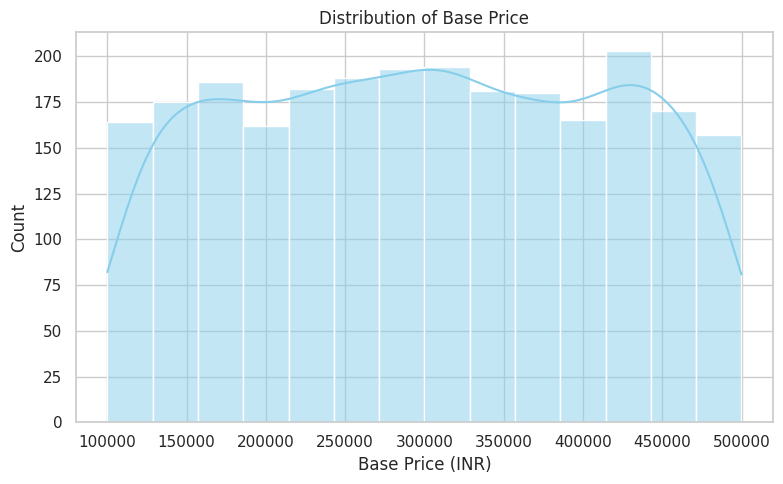

In [24]:

import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Base Price (INR)"], kde=True, color='skyblue')
plt.title("Distribution of Base Price")
plt.xlabel("Base Price (INR)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

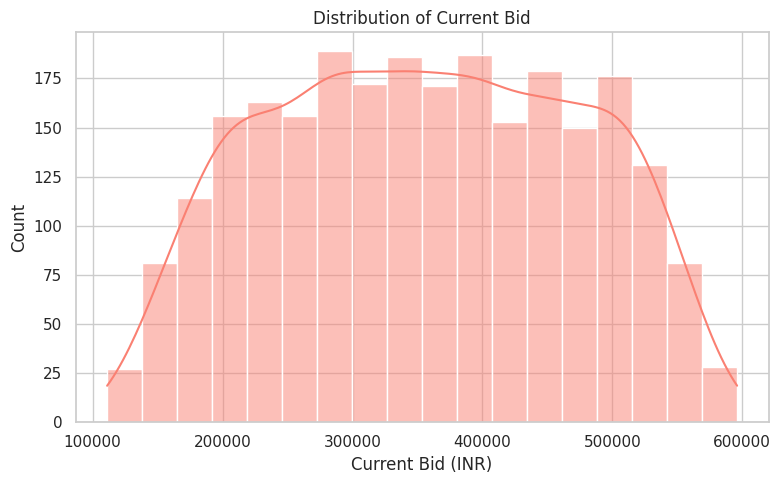

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Current Bid (INR)"], kde=True, color='salmon')
plt.title("Distribution of Current Bid")
plt.xlabel("Current Bid (INR)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

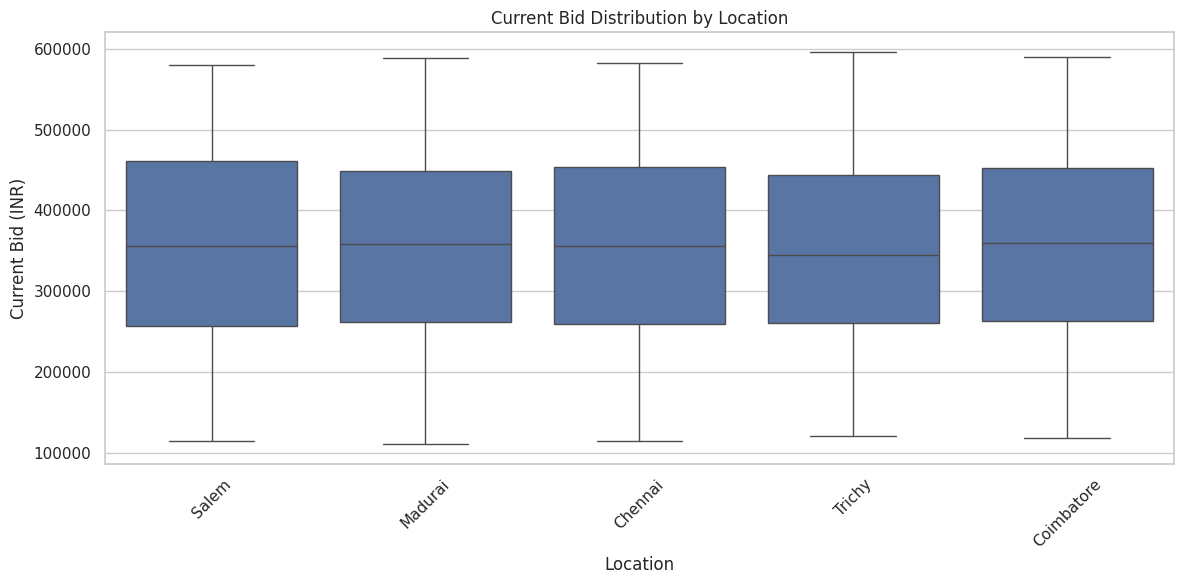

In [26]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Current Bid (INR)", data=df)
plt.title("Current Bid Distribution by Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



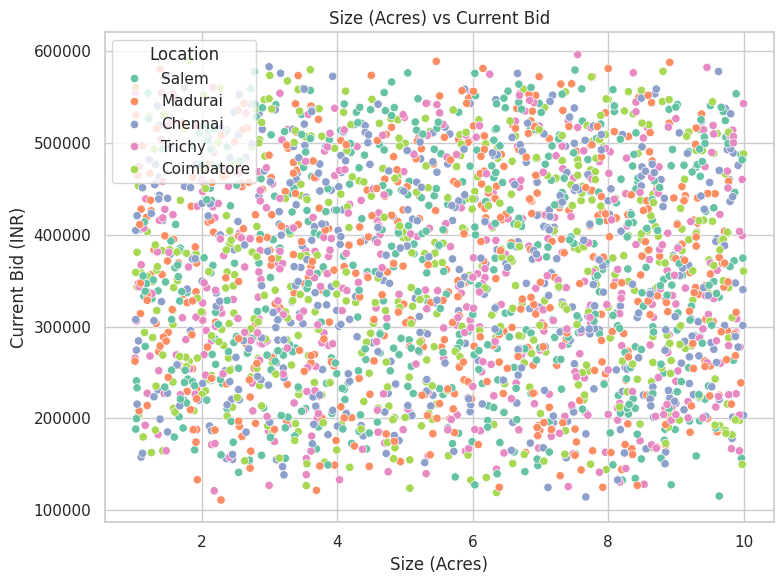

In [27]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Size (Acres)", y="Current Bid (INR)", hue="Location", data=df, palette="Set2")
plt.title("Size (Acres) vs Current Bid")
plt.tight_layout()
plt.show()



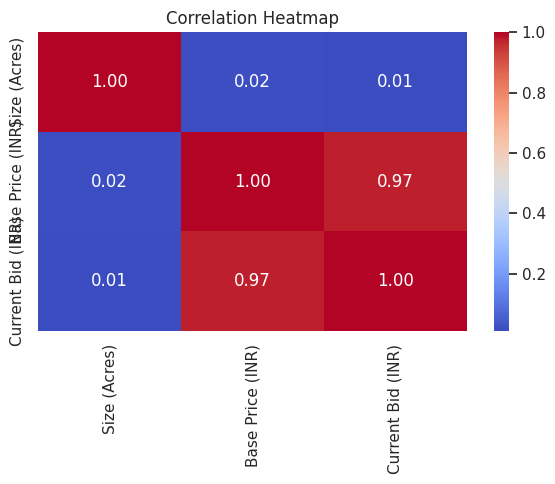

In [28]:

plt.figure(figsize=(6, 5))
corr = df[["Size (Acres)", "Base Price (INR)", "Current Bid (INR)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
df["Bid Increment Ratio"] = (df["Current Bid (INR)"] - df["Base Price (INR)"]) / df["Base Price (INR)"]

# Log Transformations
df["Log_Base_Price"] = np.log1p(df["Base Price (INR)"])
df["Log_Current_Bid"] = np.log1p(df["Current Bid (INR)"])


df["Size Category"] = pd.cut(df["Size (Acres)"],
                             bins=[0, 1, 5, 20, 1000],
                             labels=["Very Small", "Small", "Medium", "Large"])


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[["Size (Acres)", "Base Price (INR)"]])



In [46]:
# Encode the 'Location' column
label_encoder = LabelEncoder()
df["Location"] = label_encoder.fit_transform(df["Location"])

In [47]:
X = df[["Location", "Size (Acres)", "Base Price (INR)"]]
y = df["Current Bid (INR)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# NGBoost Model
ngb = NGBRegressor(Dist=Normal, Score=MLE, verbose=False) # Changed Score=MLE() to Score=MLE
ngb.fit(X_train, y_train)




NGBRegressor(random_state=RandomState(MT19937) at 0x7C261FF1E540, verbose=False)

In [49]:
# Prediction
y_pred = ngb.predict(X_test)



In [50]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [51]:
# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 22530.84
Mean Squared Error (MSE): 695357049.74
Root Mean Squared Error (RMSE): 26369.62
R² Score: 0.9474


In [3]:
pip install ngboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 12.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=26bf10d899a28e68aeab7deae23e9b40e85011519b169c4aadac8760082e3380
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


#Rando forests

In [52]:
# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)




In [53]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [54]:

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 23923.44
Mean Squared Error (MSE): 803682210.28
Root Mean Squared Error (RMSE): 28349.29
R² Score: 0.9392


#Comparison Graph

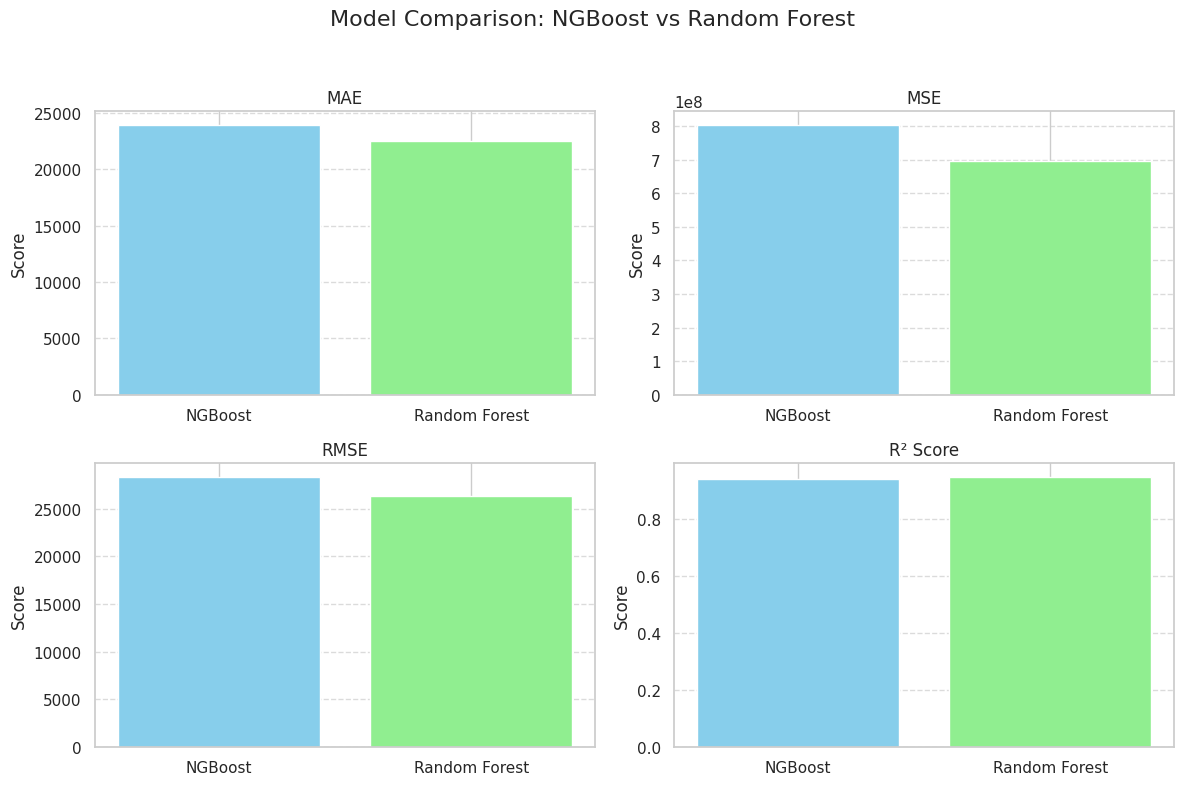

In [55]:
import matplotlib.pyplot as plt

# Define metrics and values
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
ngboost_scores = [23923.44, 803682210.28, 28349.29, 0.9392]
rf_scores = [22524.76, 695152282.61, 26365.74, 0.9474]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    axs[i].bar(['NGBoost', 'Random Forest'], [ngboost_scores[i], rf_scores[i]], color=['skyblue', 'lightgreen'])
    axs[i].set_title(metric)
    axs[i].set_ylabel("Score")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Model Comparison: NGBoost vs Random Forest', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


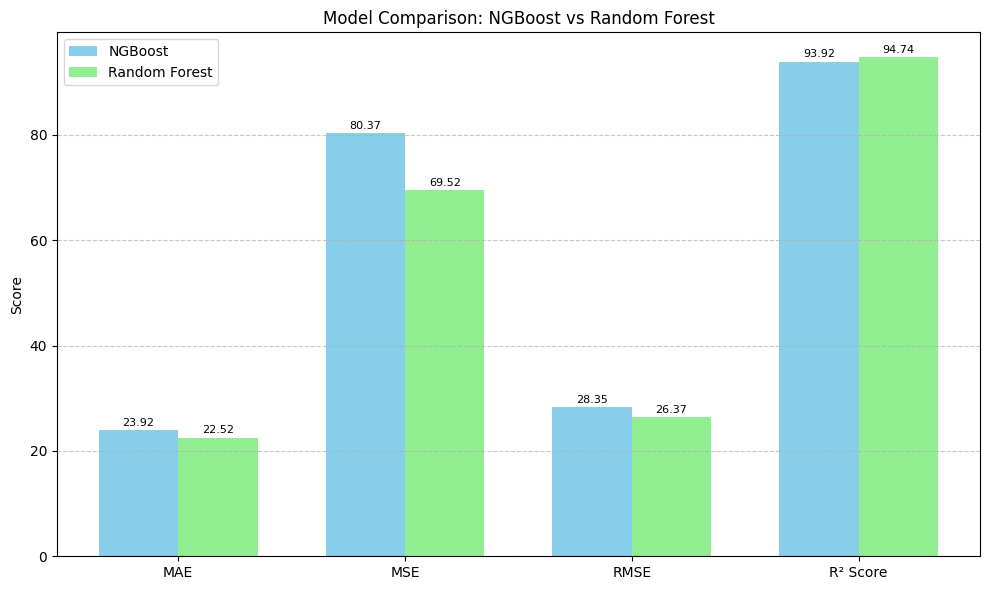

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
ngboost_scores = [23.92344, 80.368221028, 28.34929, 93.92]
rf_scores = [22.52476, 69.515228261, 26.36574, 94.74]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ngboost_scores, width, label='NGBoost', color='skyblue')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightgreen')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Comparison: NGBoost vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Grid and formatting
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# User Test Forum

In [18]:
# --- User Input Section ---
print("\n--- Predict Highest Bidding Price ---")
# Get location names for reference
location_names = label_encoder.classes_
print("Available Locations:")
for i, name in enumerate(location_names):
    print(f"{i}: {name}")

# User Inputs
loc_input = input("Enter location name from above list: ").strip()
if loc_input not in location_names:
    print("Invalid location name.")
else:
    loc_encoded = label_encoder.transform([loc_input])[0]
    size = float(input("Enter land size (in Acres): "))
    base_price = float(input("Enter base price (INR): "))

    # Create input for prediction
    user_input = pd.DataFrame([[loc_encoded, size, base_price]], columns=["Location", "Size (Acres)", "Base Price (INR)"])

    # Predict
    predicted_bid = ngb.predict(user_input)[0]
    print(f"\nPredicted Highest Bidding Price: ₹{predicted_bid:,.2f}")


--- Predict Highest Bidding Price ---
Available Locations:
0: Chennai
1: Coimbatore
2: Madurai
3: Salem
4: Trichy
Enter location name from above list: Chennai
Enter land size (in Acres): 3.4
Enter base price (INR): 378733

Predicted Highest Bidding Price: ₹438,630.91
